In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import math

In [ ]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [ ]:
df = pd.read_csv('df.csv')
df

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855
...,...,...,...,...
995,150.570007,0.009752,0.004634,0.003859
996,151.600006,-0.009341,-0.015325,0.018259
997,151.300003,0.036120,-0.006195,-0.007928
998,152.619995,0.001542,0.005778,-0.000381


In [ ]:
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close_ETF  1000 non-null   float64
 1   oil        1000 non-null   float64
 2   gold       1000 non-null   float64
 3   JPM        1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


# Part 3

Shapiro Wilkl:- W=0.9692050814628601, p=1.0206207623833508e-13


<Figure size 1440x720 with 0 Axes>

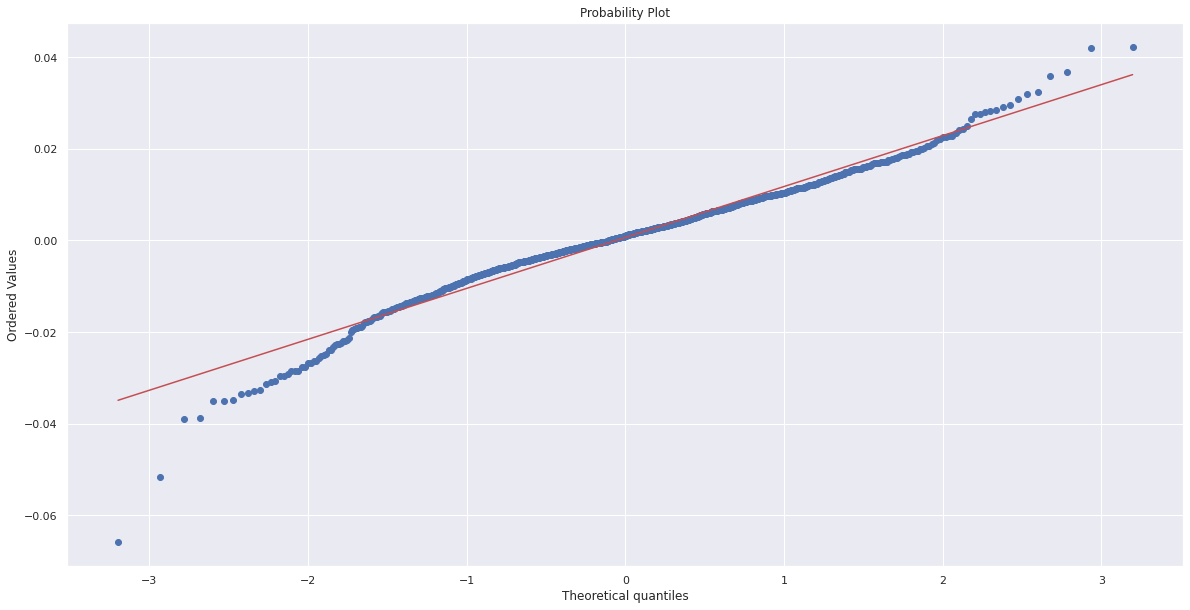

<Figure size 1440x720 with 0 Axes>

In [ ]:
w , p = stats.shapiro(np.array(df['gold']))
print("Shapiro Wilkl:- W={}, p={}".format(w,p))
stats.probplot(np.array(df['gold']),plot=plt)
plt.figure()

# H0 - data is normal H1 - not normal
# 

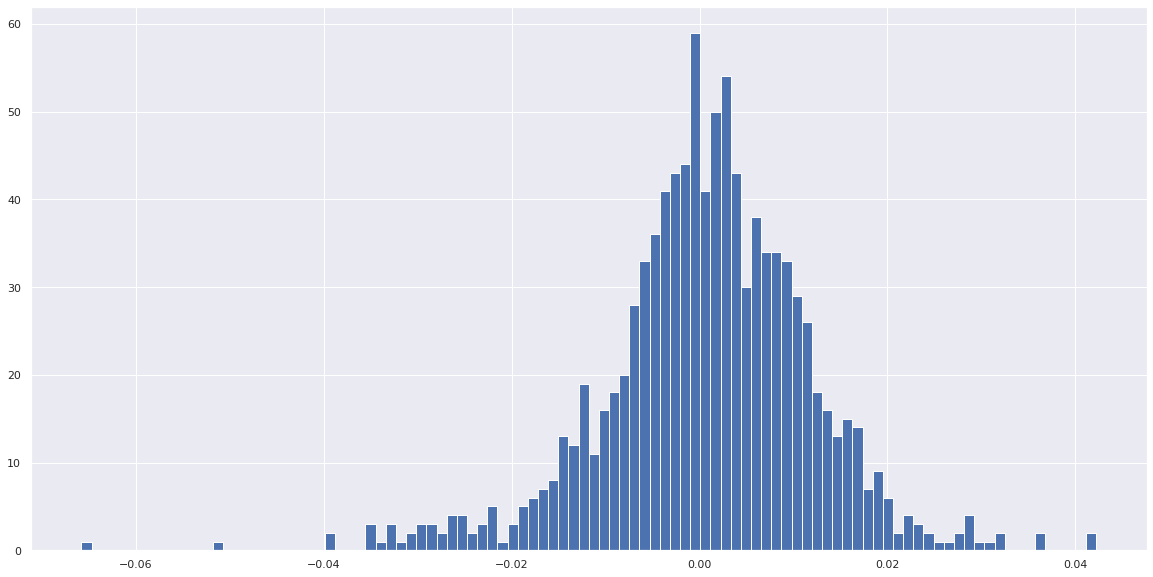

In [ ]:
plt.hist(np.array(df['gold']), bins=100)
plt.show()

Shapiro Wilkl:- W=0.9886544346809387, p=5.487161729433865e-07


<Figure size 1440x720 with 0 Axes>

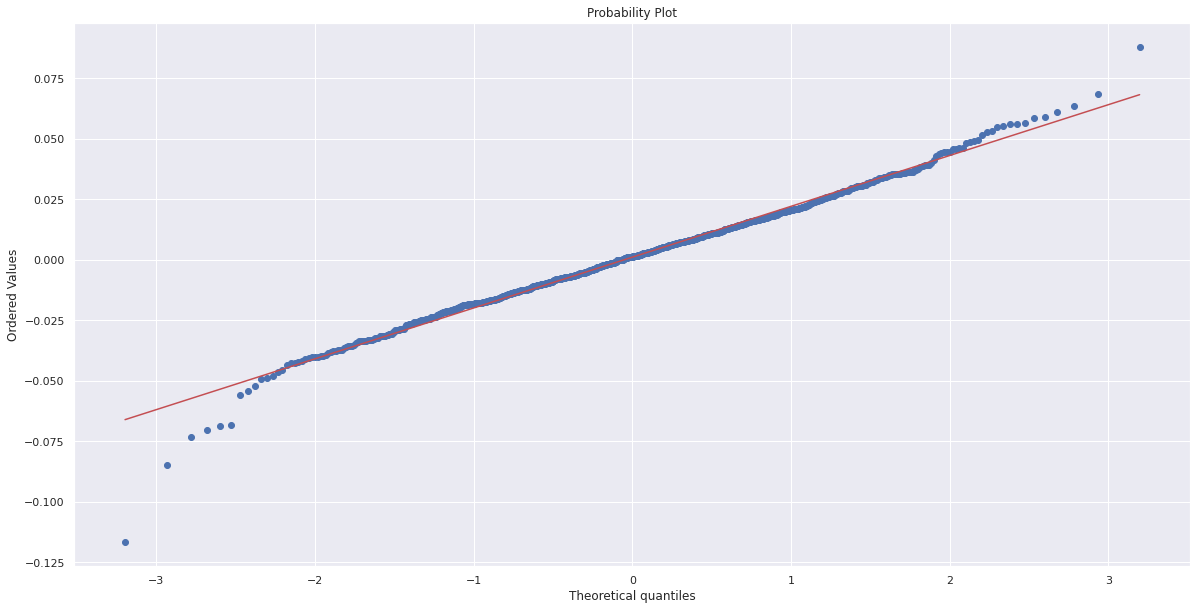

<Figure size 1440x720 with 0 Axes>

In [ ]:
w , p = stats.shapiro(np.array(df['oil']))
print("Shapiro Wilkl:- W={}, p={}".format(w,p))
stats.probplot(np.array(df['oil']),plot=plt)
plt.figure()

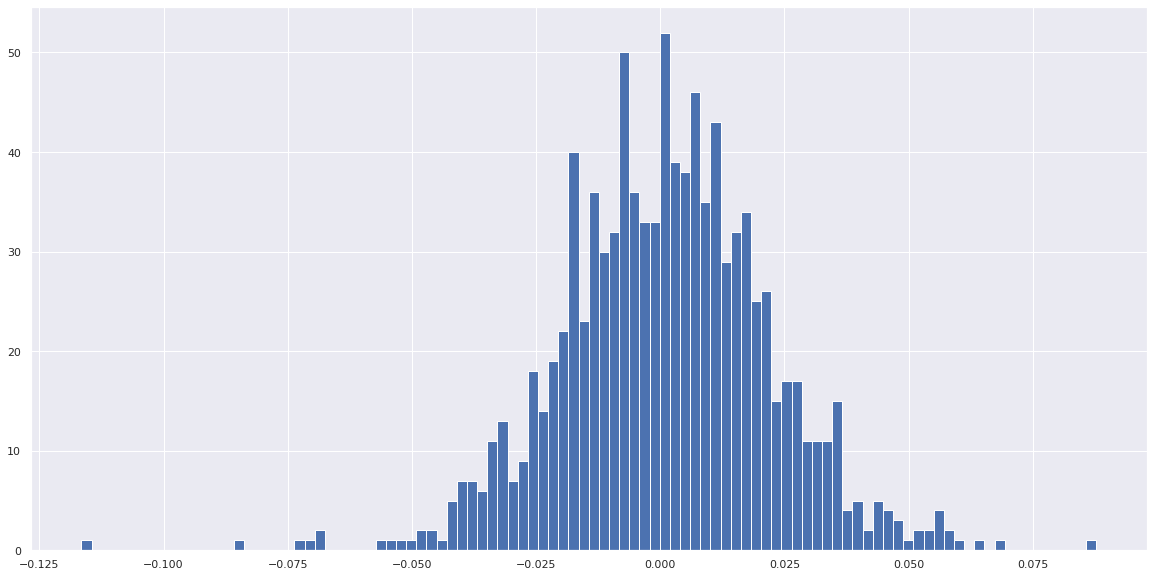

In [ ]:
plt.hist(np.array(df['oil']), bins=100)
plt.show()

Shapiro Wilkl:- W=0.9798560738563538, p=1.5373954886932495e-10


<Figure size 1440x720 with 0 Axes>

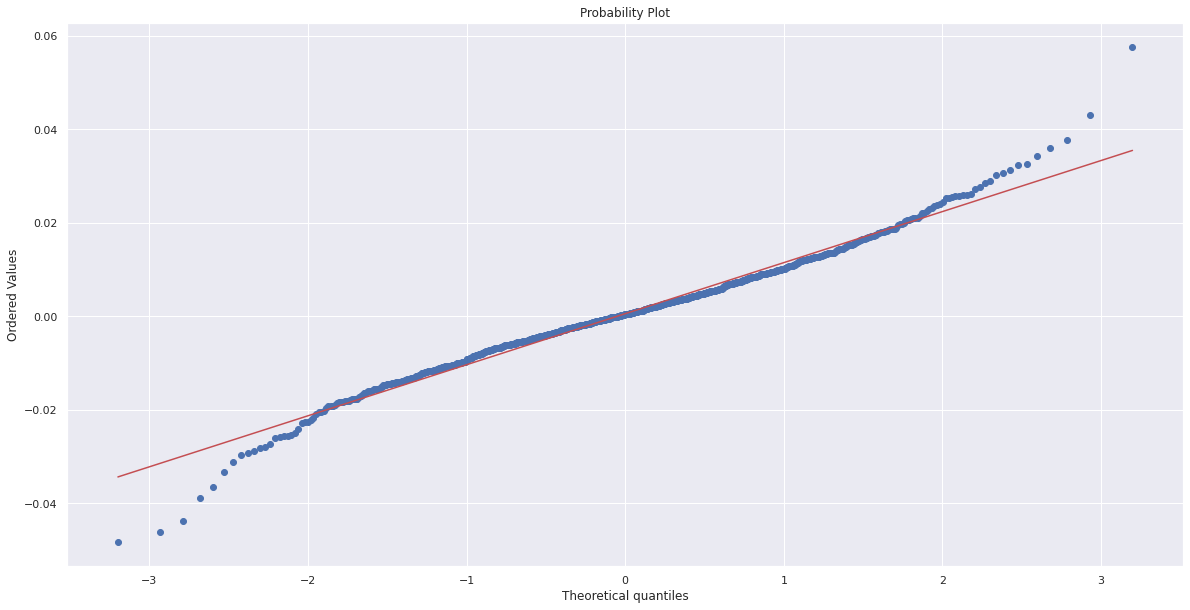

<Figure size 1440x720 with 0 Axes>

In [ ]:
w , p = stats.shapiro(np.array(df['JPM']))
print("Shapiro Wilkl:- W={}, p={}".format(w,p))
stats.probplot(np.array(df['JPM']),plot=plt)
plt.figure()

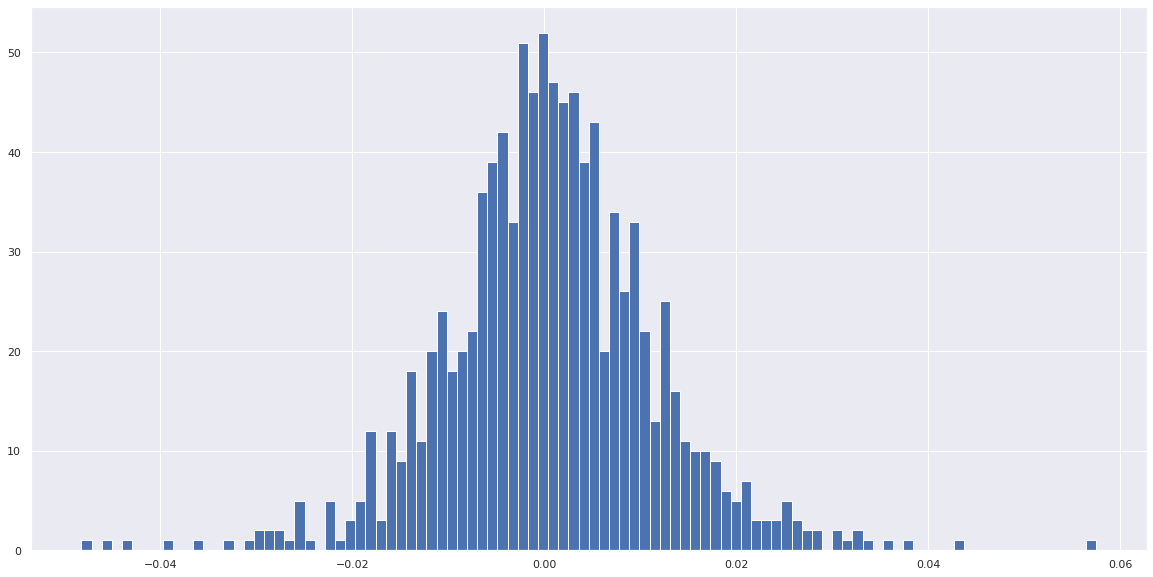

In [ ]:
plt.hist(np.array(df['JPM']), bins=100)
plt.show()

Shapiro Wilkl:- W=0.9795047640800476, p=1.1655147680311728e-10


<Figure size 1440x720 with 0 Axes>

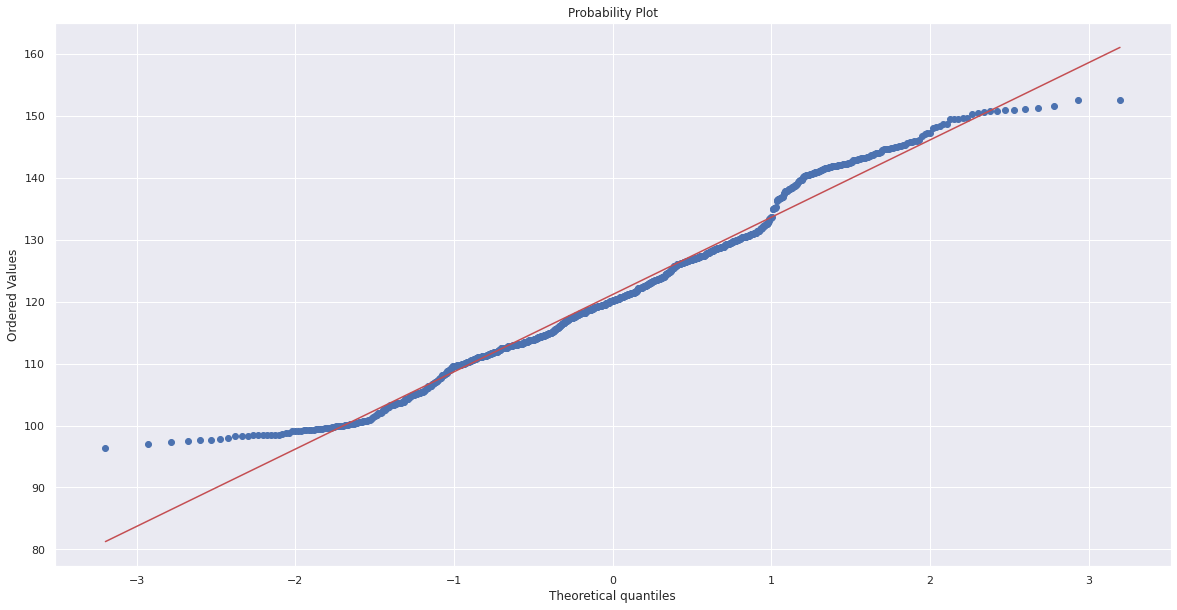

<Figure size 1440x720 with 0 Axes>

In [ ]:
w , p = stats.shapiro(np.array(df['Close_ETF']))
print("Shapiro Wilkl:- W={}, p={}".format(w,p))
stats.probplot(np.array(df['Close_ETF']),plot=plt)
plt.figure()

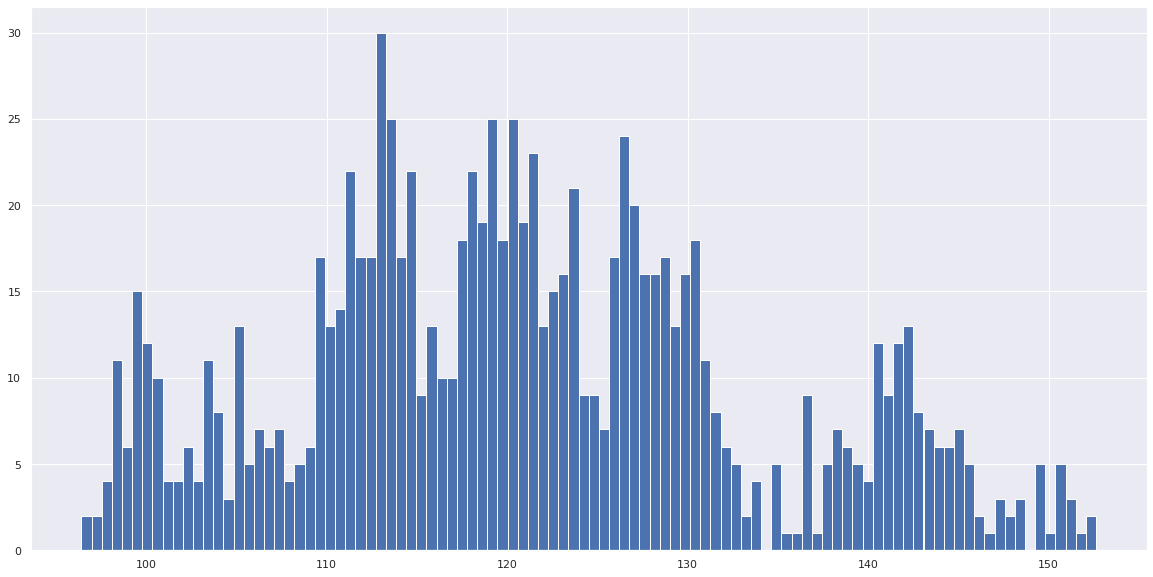

In [ ]:
plt.hist(np.array(df['Close_ETF']), bins=100)
plt.show()

In [ ]:
from scipy import stats

stats.kstest(np.array(df['oil']), 'norm')

KstestResult(statistic=0.4727185265212216, pvalue=1.2565304659420574e-205)

In [ ]:
print(stats.skew(np.array(df['JPM'])))

0.011025631535947825


In [ ]:
print(stats.skew(np.array(df['oil'])))

-0.15618809219158533


In [ ]:
print(stats.skew(np.array(df['gold'])))

-0.5232400185875283


In [ ]:
print(stats.skew(np.array(df['Close_ETF'])))

0.3059866902884341


# Part 4.1

In [ ]:
np.mean(df['Close_ETF'])

121.1529600120001

In [ ]:
np.std(df['Close_ETF'])

12.563503845944297

# Part 4.2

In [ ]:
etf_values_50 = df['Close_ETF']
etf_values_50 = np.array_split(etf_values_50, 50)

In [ ]:
len(etf_values_50)

50

In [ ]:
means = []

for i in etf_values_50:
    means.append(np.average(i))
    
len(means)

50

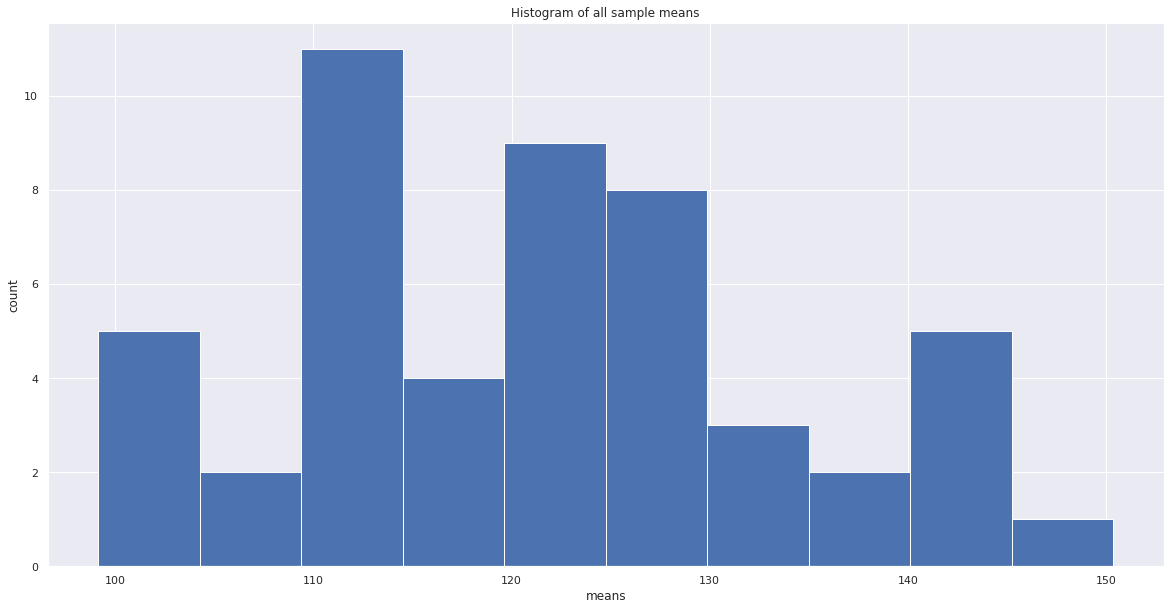

In [ ]:
plt.hist(means, bins=10)
plt.title('Histogram of all sample means')
plt.xlabel('means')
plt.ylabel('count')

plt.show()

# Part 4.3

In [ ]:
meanOfMeans = np.average(means)
meanOfMeans

121.15296001200001

In [ ]:
stdOfMeans = np.std(means)
stdOfMeans

12.48917589776901

In [ ]:
# comparison between 𝜇𝑥 and 𝜇𝑥
# 𝜇𝑥 121.152960
# 𝜇𝑥(bar) 121.15296001200001

# they are identical

In [ ]:
# between 𝜎𝑥/root of (n) and 𝜎𝑥(bar) 

sigma_x = 12.4891/np.sqrt(len(etf_values_50))

sigma_x, stdOfMeans

(1.7662254601833822, 12.48917589776901)

# Part 4.4

In [ ]:
etf_values_10 = df['Close_ETF']
etf_values_10 = np.array_split(etf_values_10, 10)

In [ ]:
len(etf_values_10[0])

100

In [ ]:
means = []

for i in etf_values_10:
    means.append(np.average(i))
    
len(means)

10

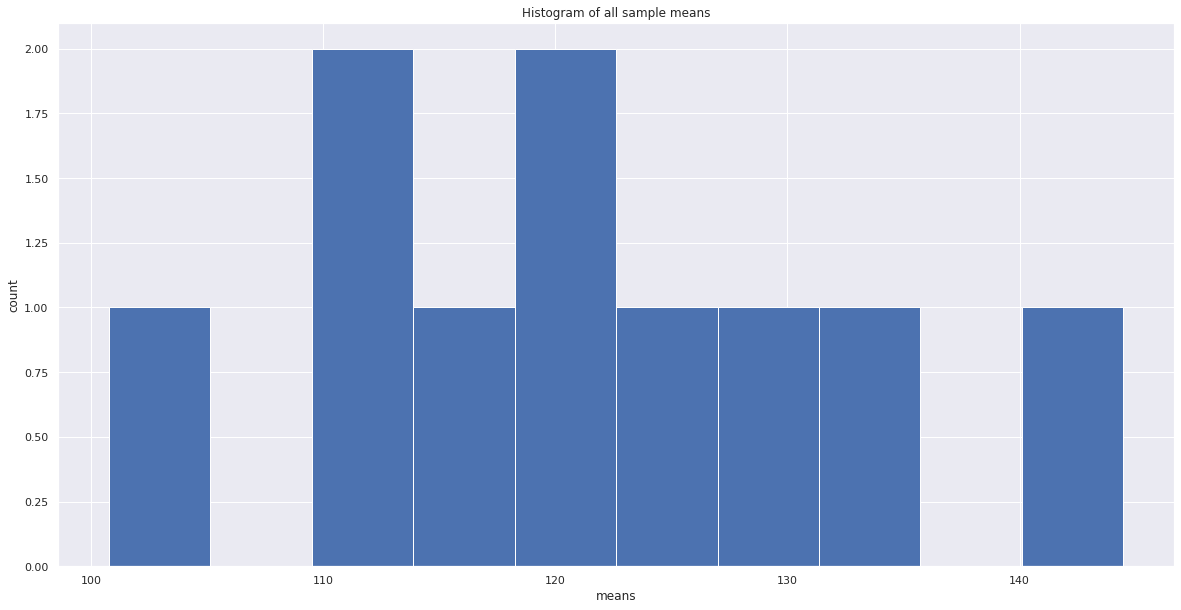

In [ ]:
plt.hist(means, bins=10)
plt.title('Histogram of all sample means')
plt.xlabel('means')
plt.ylabel('count')

plt.show()

In [ ]:
meanOfMeans = np.average(means)
meanOfMeans

121.152960012

In [ ]:
stdOfMeans = np.std(means)
stdOfMeans

12.163756860892589

In [ ]:
# between 𝜎𝑥/root of (n) and 𝜎𝑥(bar) 

sigma_x = 12.569790/np.sqrt(len(etf_values_10))

sigma_x, stdOfMeans

(3.974916611000789, 12.163756860892589)

# Part 4.8

In [ ]:
etf_values_random50 = []

for i in range(10):
    sample = np.random.choice((np.array(df['Close_ETF'])), 50, replace=True)
    etf_values_random50.append(sample)

In [ ]:
len(etf_values_random50[0])

50

In [ ]:
means = []

for i in etf_values_random50:
    means.append(np.average(i))

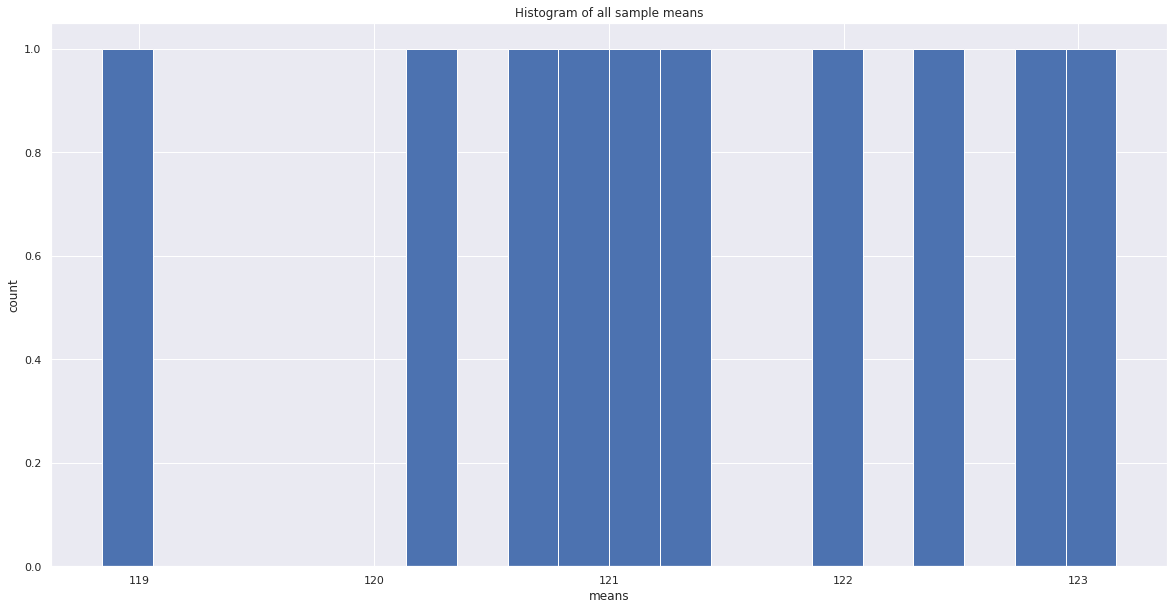

In [ ]:
plt.hist(means, bins=20)
plt.title('Histogram of all sample means')
plt.xlabel('means')
plt.ylabel('count')

plt.show()

In [ ]:
meanOfMeans = np.average(means)
meanOfMeans

121.353299896

In [ ]:
# between 𝜎𝑥/root of (n) and 𝜎𝑥(bar) 

sigma_x = 12.569790/np.sqrt(len(etf_values_random50))

sigma_x, stdOfMeans

(3.974916611000789, 12.163756860892589)

# Part 4.10

In [ ]:
etf_values_random10 = []

for i in range(10000):
    sample = np.random.choice(np.array(df['Close_ETF']), 100, replace=True)
    etf_values_random10.append(sample)

In [ ]:
means = []

for i in etf_values_random10:
    means.append(np.average(i))
    
np.average(means)

121.16433560259601

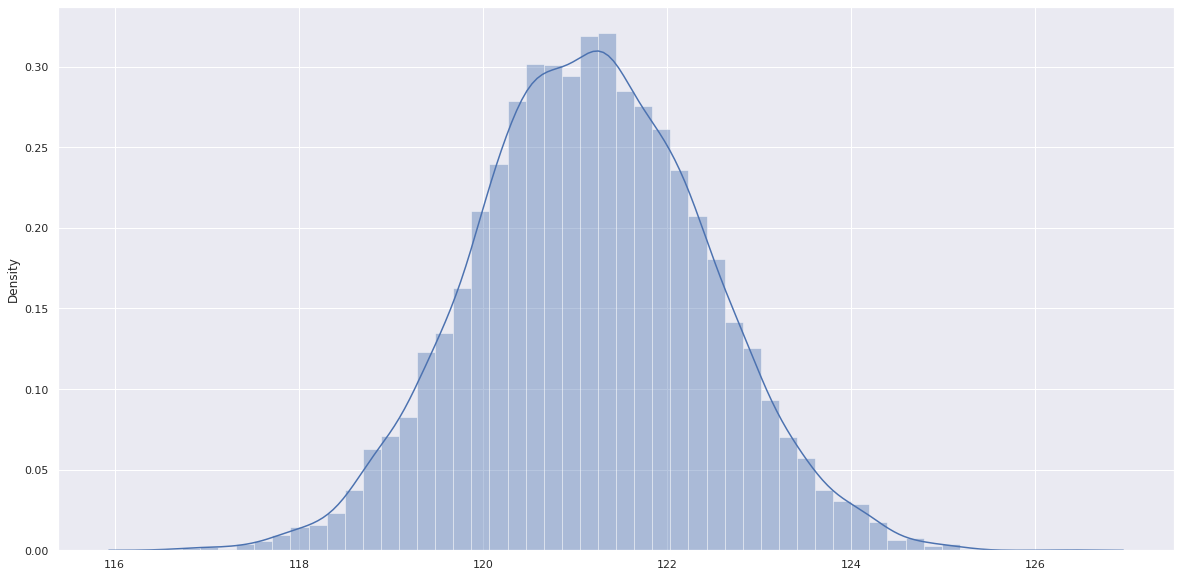

In [ ]:
sns.distplot(means, hist=True, kde=True)


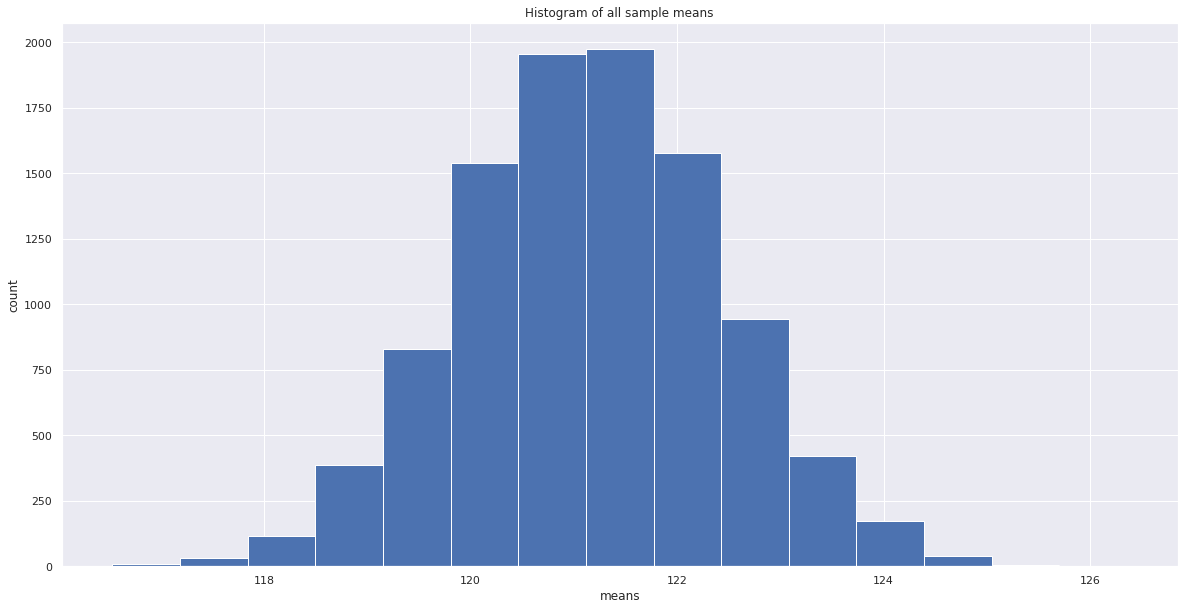

In [ ]:
plt.hist(means, bins=15)
plt.title('Histogram of all sample means')
plt.xlabel('means')
plt.ylabel('count')

plt.show()

In [ ]:
stdOfMeans = np.std(means)
stdOfMeans

1.2555787410293748

In [ ]:
# between 𝜎𝑥/root of (n) and 𝜎𝑥(bar) 

sigma_x = 12.569790/np.sqrt(len(means))

sigma_x, stdOfMeans

(0.1256979, 1.2555787410293748)

# Part 5.1

In [ ]:
import scipy.stats as st

df_etf = df['Close_ETF']

In [ ]:
df_etf = df['Close_ETF']
etf_sample_100 = df_etf.sample(n=100, replace=True, random_state=100)

In [ ]:
# Confidence Interval is given by:- x +/- t*(s/√n)

# where
#    x: sample mean(122.156)
#    t: t-value that corresponds to the confidence level 0.05 (1.960)
#    s: sample standard deviation(13.64)
#    n: sample size(100)

122.156 - 1.960*(np.std(etf_sample_100)/np.sqrt(len(etf_sample_100))),122.156 + 1.960*(np.std(etf_sample_100)/np.sqrt(len(etf_sample_100)))

# 95% Confidence Interval: 122.15 ± 2.67

(119.48113668779801, 124.830863312202)

In [ ]:
st.norm.interval(alpha=0.95, loc=np.mean(etf_sample_100), scale=st.sem(etf_sample_100))

# We chose the scipy.stats.norm.interval() method since the sample size is greater than 30 

# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation divided by
# the square root of sample length. 

# reference https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
# https://www.statology.org/confidence-intervals-python/

(119.46781113944346, 124.84438990055662)

In [ ]:
# the range is 124.83 - 119.48 = 5.36

In [ ]:
# Part 5.2

In [ ]:
etf_sample_20 = df_etf.sample(n=20, replace=True,  random_state=100)

In [ ]:
# Using the same formula as above

125.422 - 1.960*(np.std(etf_sample_20)/np.sqrt(len(etf_sample_20))),125.422 + 1.960*(np.std(etf_sample_20)/np.sqrt(len(etf_sample_20)))

(120.07492723467257, 130.76907276532742)

In [ ]:
# using the scipy.norm.interval() method 

st.norm.interval(alpha=0.95, loc=np.mean(etf_sample_20), scale=st.sem(etf_sample_20))

(119.93612040193646, 130.90788059806357)

In [ ]:
# we used the scipy.t.interval() method here since, the number of data points in this sample is only 20

st.t.interval(alpha=0.95, df = 19, loc=np.mean(etf_sample_20), scale=st.sem(etf_sample_20))

(119.56368927825525, 131.28031172174477)

In [ ]:
np.std(etf_sample_20)

12.200426718275418

In [ ]:
# wilcoxon test since the sample doesn't follow a normal distribution

#x <- c(119.860001,
# 126.209999,
# 131.470001,
# 138.580002,
# 136.83999599999999,
# 102.940002,
# 138.669998,
# 140.53999299999998,
# 110.519997,
# 140.740005,
# 138.080002,
# 99.620003,
# 123.150002,
# 132.520004,
# 119.529999,
# 127.900002,
# 127.730003,
# 111.860001,
# 127.379997,
# 114.300003)

# > wilcox.test(x, mu=122.156100, conf.int = T)

# alternative hypothesis: true location is not equal to 122.1561
# 95 percent confidence interval:
# 119.620 <-> 132.395

# reference https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/wilcox.test

In [ ]:
# the range is 132.395 - 119.62 = 12.77

# Part 5.3

In [ ]:
# Reference : https://www.statology.org/confidence-intervals-python/
#             https://www.youtube.com/watch?v=MUD390jtgQs

# Online calculator : https://www.mathsisfun.com/data/confidence-interval-calculator.html

# Observation :

# 121.152960 is the population mean and yes it is included in both the intervals calculated above
# the confidence interval constructed using the first sample gives more accurate result, since the population size 
# is greater in that case


# Part 6.1 

In [ ]:
meanSampData = np.mean(etf_sample_100)
hypMean = 100
n = 100
std_pop = np.std(df_etf)

In [ ]:
np.mean(etf_sample_100)

122.15610052000004

In [ ]:
# We went with the z-test since the popluation std deviation is known which is 12.569 and the sample size is >30

# even though z-test assumes normal distribution and the data is not normally distributed, the sample size 
# (100 in this case) is large enough to conduct the test

# Now the formula for z - value is 

z = (meanSampData-hypMean)/(std_pop/np.sqrt(n))
z

17.635287728393052

In [ ]:
# Method 1(using p-value)

# Using the P-value approach: The p-value is p=0 and since 0<0.05

# it is concluded that the null hypothesis is rejected.

# https://mathcracker.com/z-test-for-one-mean

In [ ]:
# Method 2(using critical values): 

# this is a 2 sided test

# value of z at .05 making it .025 for 2 sided we know from z table z = (+ 1.96 to -1.96)

# as calculated z score 17.63 is greater than 1.96 (tabular z score), we reject the null hypothesis

# Observed z-value = 17.63

# Critical value = 1.96

# Reference : https://github.com/sharmasw/Data-Science-with-python/blob/master/Statistics%20Notebooks/Hypothesis%20Testing.ipynb
#             https://www.youtube.com/watch?v=kd6zKBa9Rfk
#             https://www.statisticshowto.com/probability-and-statistics/find-critical-values/

# Online calculator : https://mathcracker.com/z-test-for-one-mean

# Part 6.2

In [ ]:
meanSampData = np.mean(etf_sample_20)
hypMean = 100
n = 20
std_sam = np.std(etf_sample_20)
pop_mean = 121.152

In [ ]:
T = (meanSampData-pop_mean)/(std_sam/np.sqrt(n))
T

1.5651930219220667

In [ ]:
# Observations: for t test

# this is a 2 sided test

# value of t at .05 making it .025 for 2 sided we know from t table t = (+ -) 2.093

# as calculated t value 1.565 is lesser than 2.093, we failed to reject the null hypothesis

# Reference https://www.statisticshowto.com/probability-and-statistics/t-distribution/t-score-formula/

# Observations : for wilcoxon test

# References https://sixsigmastudyguide.com/1-sample-wilcoxon-non-parametric-hypothesis-test/
#            http://www.sthda.com/english/wiki/one-sample-wilcoxon-signed-rank-test-in-r        

# x <- c(119.860001,
# 126.209999,
# 131.470001,
# 138.580002,
# 136.83999599999999,
# 102.940002,
# 138.669998,
# 140.53999299999998,
# 110.519997,
# 140.740005,
# 138.080002,
# 99.620003,
# 123.150002,
# 132.520004,
# 119.529999,
# 127.900002,
# 127.730003,
# 111.860001,
# 127.379997,
# 114.300003)
# > wilcox.test(x, mu = 100, alternative = "two.sided")
#    Wilcoxon signed rank test
# data:  x
# V = 209, p-value = 3.815e-06
# alternative hypothesis: true location is not equal to 100

# Part 6.3

In [ ]:
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda358.htm
# Using the Chi-Square method(two tailed)
etf_sample_20 = df_etf.sample(n=20, replace=True,  random_state=100)
N = len(etf_sample_20)
stdSampData = np.std(etf_sample_20)
hypStd = 15 

T = [(N-1) * ((stdSampData/hypStd)**2)]
T

[12.569590355787401]

In [ ]:
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm
# reject if greater than 32.852  and less than 8.907
# Hence we failed to reject the null hypothesis
# But for random_state = 0 the null hypothesis is getting rejected

# Part 6.4 (not two tailed)

In [ ]:
# Using the Chi-Square method one tailed 

N = 20
stdSampData = np.std(etf_sample_20)
hypStd = 15

T = [(N-1) * ((stdSampData/hypStd)**2)]
T


[12.569590355787401]

In [ ]:
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm

# reject if less than 10.117

In [ ]:
# Observations: Failed to reject the Null hypothesis 


# Part 7.1 

In [ ]:
# manual formula method
x = np.array(df['oil'])
y = np.array(df['gold'])

t = (np.mean(x)-np.mean(y))/np.sqrt(((np.std(x)*np.std(x))/len(x))+((np.std(y)*np.std(y))/len(y)))
pval = st.t.sf(np.abs(t), 1000-1)*2

t , pval
# https://www.socscistatistics.com/pvalues/tdistribution.aspx

(0.48560947929478604, 0.6273505577888208)

In [ ]:
# References:-
# https://www.youtube.com/watch?v=0Pd3dc1GcHc
# https://www.youtube.com/watch?v=8aaIdXENNJI
# https://github.com/bhattbhavesh91/GA_Sessions/blob/master/t_test_independence/T_Test_Sales.ipynb

# Observations:-
# We failed to reject the null hypothesis (the means of oil and gold are equal) for 0.05 significance level

# Part 7.2

In [ ]:
!pip install researchpy
from researchpy import ttest as rpTtest

In [ ]:
# library method

ttest_rel(df['oil'], df['gold'])

Ttest_relResult(statistic=0.5413309278514463, pvalue=0.5884002009147002)

In [ ]:
# Observations: 

# In the example we find a t-value of 0.5413 with a significance of 0.58 or 58% 
# This means that there is a 58% chance of a t-value of less than -0.5413 or a t-value of more than 0.5413, 
# hence we failed to reject the null hypothesis 

# With a usual 0.05 significance level we consider this chance to be so high, 
# that most likely there is actually not a significant difference in the population as well 

# References:

# https://www.youtube.com/watch?v=DZyDbEzaiK0
# https://www.youtube.com/watch?v=mizwZNj2aZA

In [ ]:
# manual formual mehtod 

d = df['oil'] - df['gold']
mean_d = np.mean(d)
std_d = np.std(d)
d_sqrd = d*d

t = np.sum(d)/np.sqrt((1000*np.sum(d_sqrd)-(np.sum(d)*np.sum(d)))/(998))
t

0.541059923615262

In [ ]:
# the critical value for significance level 0.05 and dof 999 is 1.96

# since 0.541 is between + or - 1.96 (we failed to reject the null hypothesis)

# Part 7.3

In [ ]:
var_oil = np.var(x) 
var_gold = np.var(y)

In [ ]:
var_oil, var_gold

(0.0004444654589137214, 0.00012731543865693258)

In [ ]:
F = (np.power(var_oil,2))/np.power(var_gold,2)
F

12.187479283391903

In [ ]:
# Reference : https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/f-test/
#             https://mathcracker.com/f-critical-values#results
# Observations

# Critical f-values: 	FL​=0.883 and FU​=1.132

# since the F value is towards the right of the critical value, we are in the rejection region

# hence we reject the null hypothesis

# Part 8.1

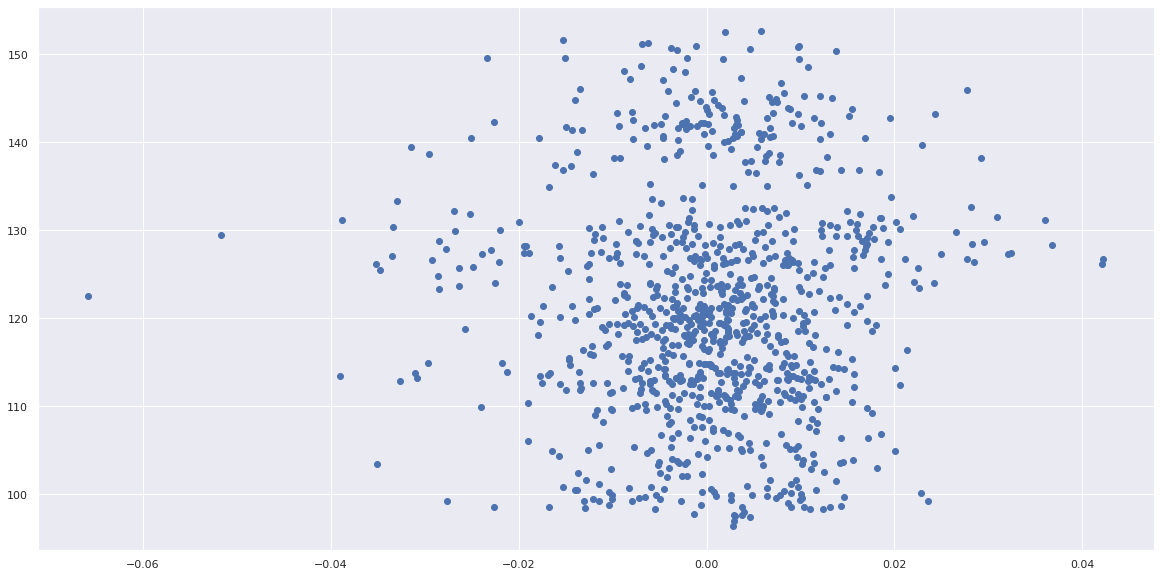

In [ ]:
x = df['gold']
y = df['Close_ETF']
# y = MinMaxScaler().fit_transform(np.array(y).reshape(-1,1))

plt.scatter(x, y)
plt.show() 

# Reference : https://www.youtube.com/watch?v=30LcZqRfPRY
# Obseravtion : no linear relationship is observed

# Part 8.2 

In [ ]:
corr = df.corr()
corr

# Reference : https://www.youtube.com/watch?v=sCkS-0kIRCE
# Obseravtion : the correlation coeficient between etf and gold came out to be 0.022996,
#               as expected the value is really close to 0... which means etf and gold are 
#               not linearly correlated

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


# Part 8.3

In [ ]:
x = np.array(x).reshape((-1, 1))
y = np.array(y)

In [ ]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = regr.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.0005287962431228532


In [ ]:
print('intercept:', regr.intercept_)
print('slope:', regr.coef_)


intercept: 121.13598849889819
slope: [25.60438932]


In [ ]:
# For non-scaled etf

# Reference : https://realpython.com/linear-regression-in-python/#simple-linear-regression

# Observation/Interpretation : 1) this model predicts etf to be 25.06 when gold is 0
#                              2) with one unit increase in gold, the value of etf rises by 121.13 

# Part 8.4

In [ ]:
# https://www.youtube.com/watch?v=0Pd3dc1GcHc
# https://www.youtube.com/watch?v=8aaIdXENNJI
# https://github.com/bhattbhavesh91/GA_Sessions/blob/master/t_test_independence/T_Test_Sales.ipynb


In [ ]:
x = df['gold']
x = np.array(x)


<function matplotlib.pyplot.figure>

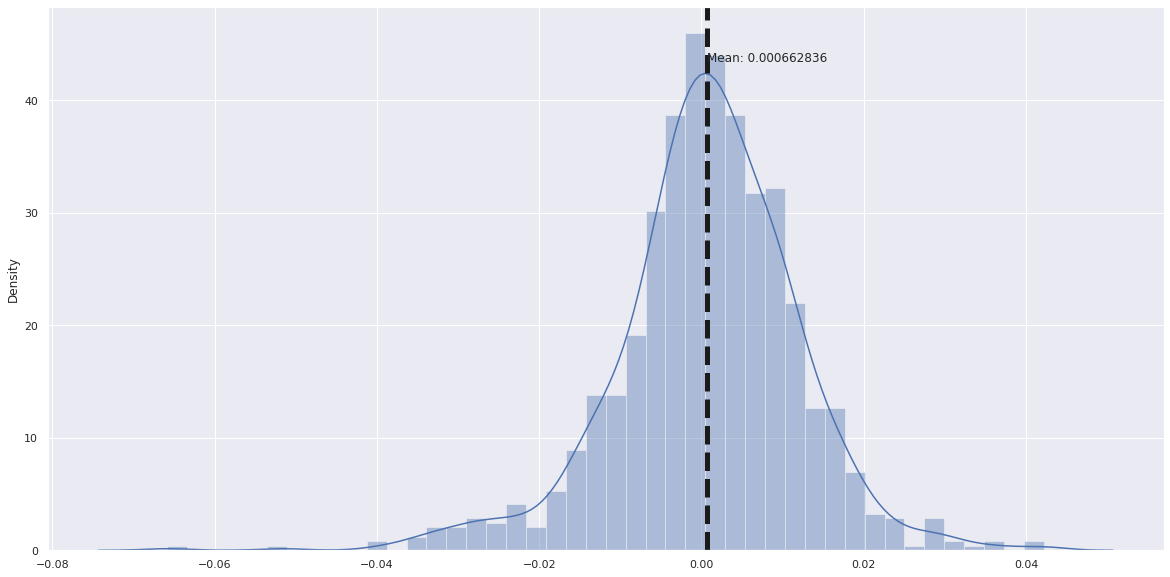

In [ ]:
# gold
plot_distribution(x)

<function matplotlib.pyplot.figure>

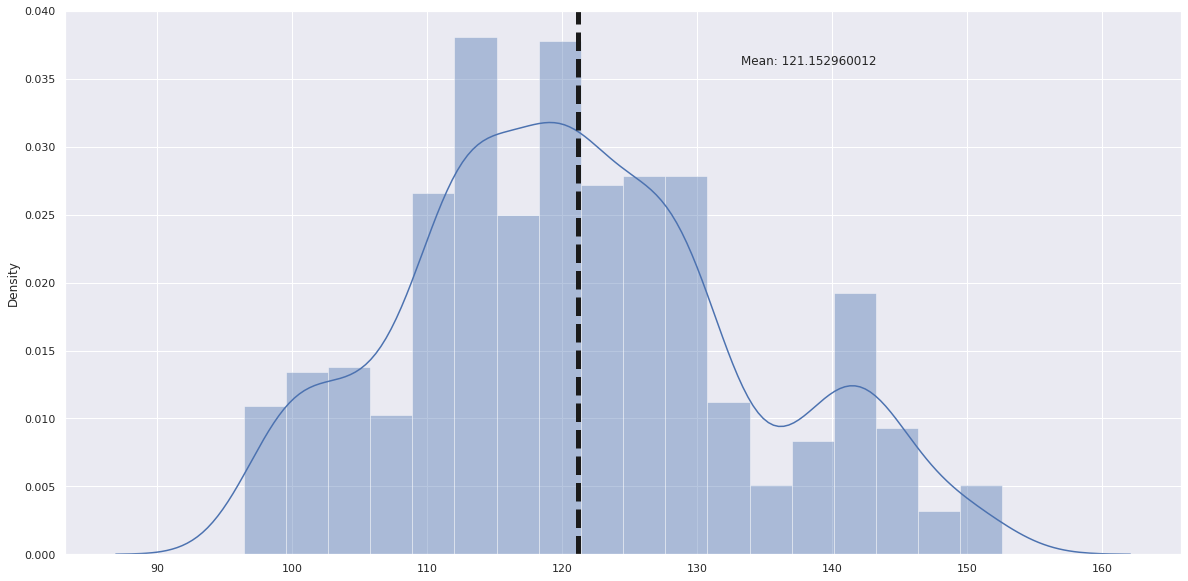

In [ ]:
# etf
plot_distribution(y)

In [ ]:
sample_size = 100
#gold_sampled = np.random.choice(x, sample_size)
#etf_sampled = np.random.choice(y, sample_size)
compare_2_groups(x, y, 0.01)

Statistics=-304.792, p=0.00000000000000000000000
Different distributions (reject H0)


In [ ]:
# observation : the statistic (t-value) has a large magnitude hence the variance between the groups is large
# hence the hypothesis 


# t - value = (variance between the groups/variance within the group)
# 

# Part 8.5

In [ ]:
# https://corporatefinanceinstitute.com/resources/knowledge/other/coefficient-of-determination/
# in short it's not a good model

# Part 8.6

In [ ]:
# https://www.statisticssolutions.com/assumptions-of-linear-regression/

# Part 8.7

In [ ]:
st.t.interval(alpha=0.99, df=len(etf_sample_100)-1, loc=121.152960) 

(118.52655454361481, 123.77936545638518)

In [ ]:
import statsmodels.api as sm
import numpy as np
from statsmodels.sandbox.regression.predstd import wls_prediction_std

fitted = sm.OLS(y,x).fit() 
sdev, lower_pred, upper_pred = wls_prediction_std(fitted, exog=x.reshape(-1,1), alpha=0.99)
#sdev, lower_pred, upper_pred


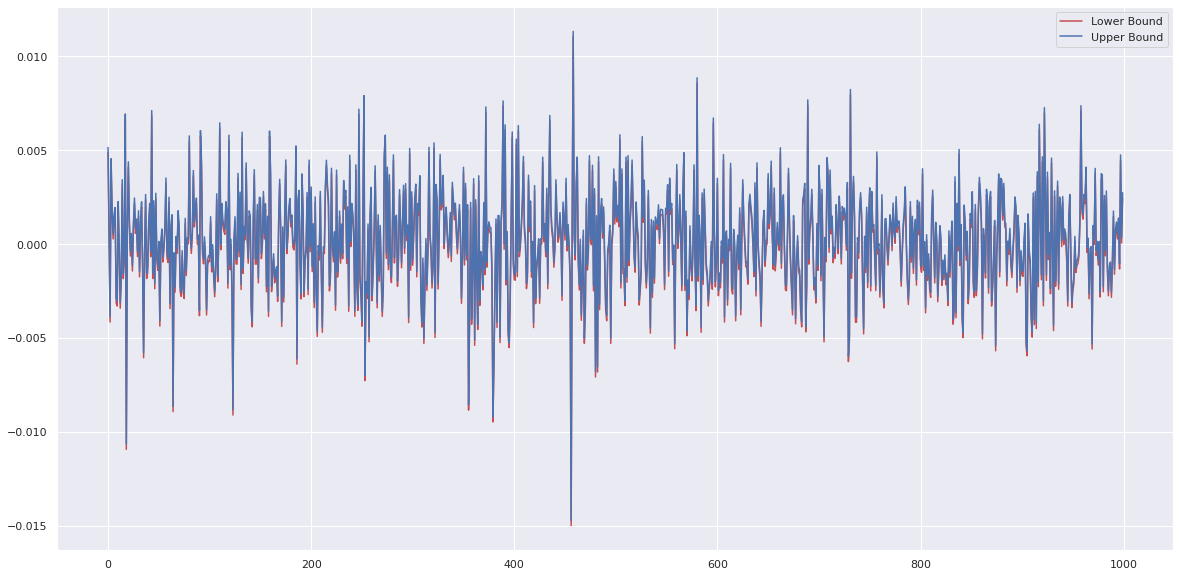

In [ ]:
plt.plot(lower_pred, 'r-', label = 'Lower Bound')
plt.plot(upper_pred,'b-',label = 'Upper Bound')
plt.legend()
plt.show()

In [ ]:
print(fitted.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.057
Model:                            OLS   Adj. R-squared (uncentered):              0.056
Method:                 Least Squares   F-statistic:                              59.89
Date:                Sat, 01 May 2021   Prob (F-statistic):                    2.45e-14
Time:                        23:47:44   Log-Likelihood:                          3092.9
No. Observations:                1000   AIC:                                     -6184.
Df Residuals:                     999   BIC:                                     -6179.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
fitted.params

array([0.12735375])

# Part 9

In [ ]:
# fit regression model using oil and gold this time

model = LinearRegression()
X, y = df[["oil", "gold"]], df.Close_ETF
model.fit(X, y)

# display adjusted R-squared which is equal to 
# 1 - [((1-r^2)*(n-1))/(n-p-1)]
# where n = number of samples, p = number of predictors

1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

-0.0012542162846487237

# Part 10

In [ ]:
# Reference : https://www.youtube.com/watch?v=rw84t7QU2O0&t=65s

In [ ]:
df = pd.read_csv('df.csv')

X, y = df[["oil", "gold"]], df.Close_ETF

# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [ ]:
results = model.fit()
results.params


const    121.067337
oil       -4.768502
gold      21.925712
dtype: float64

In [ ]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1498
Date:                Sat, 01 May 2021   Prob (F-statistic):              0.861
Time:                        23:29:07   Log-Likelihood:                -3155.7
No. Observations:                 800   AIC:                             6317.
Df Residuals:                     797   BIC:                             6331.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.0673      0.444    272.785      0.0

In [ ]:
X_test = sm.add_constant(X_test)

y_pred = results.predict(X_test)

residual = y_test - y_pred

In [ ]:
# multicolinearity/independence

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

# its following multicolinearity since the values are less than 5

,oil,gold
vif,1.050826,1.050826


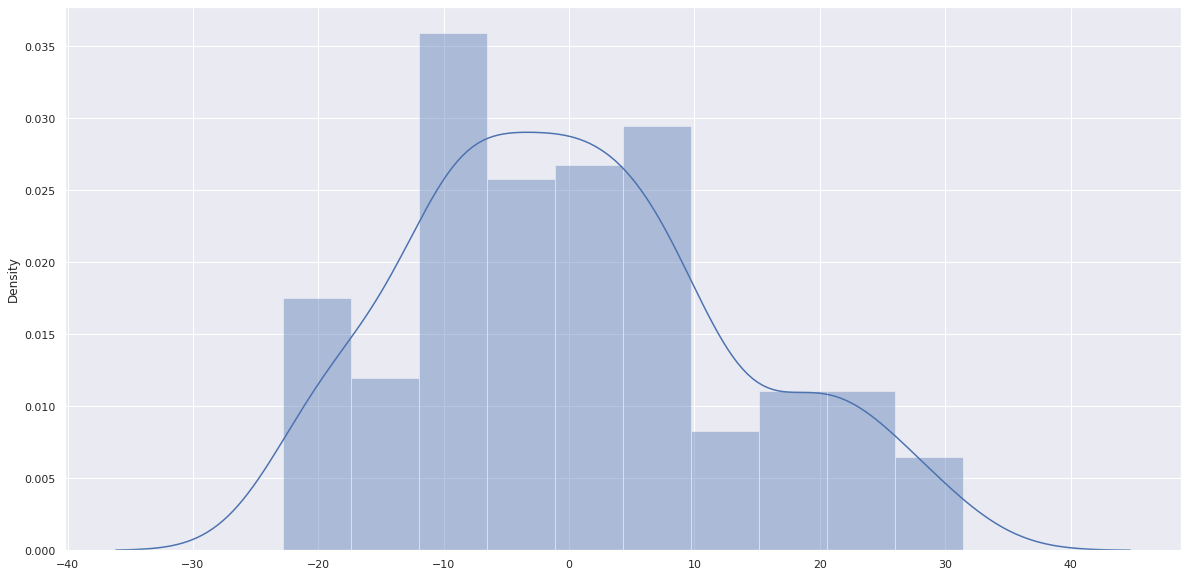

In [ ]:
# normality of residuals 

sns.distplot(residual)

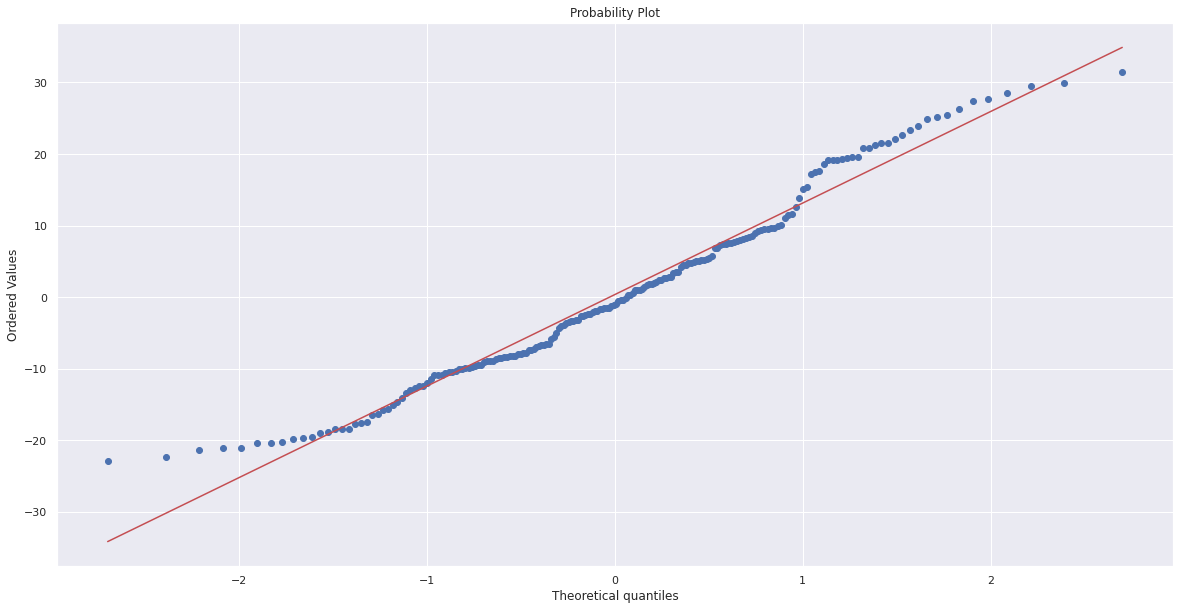

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
np.mean(residual)

0.3800063986813466

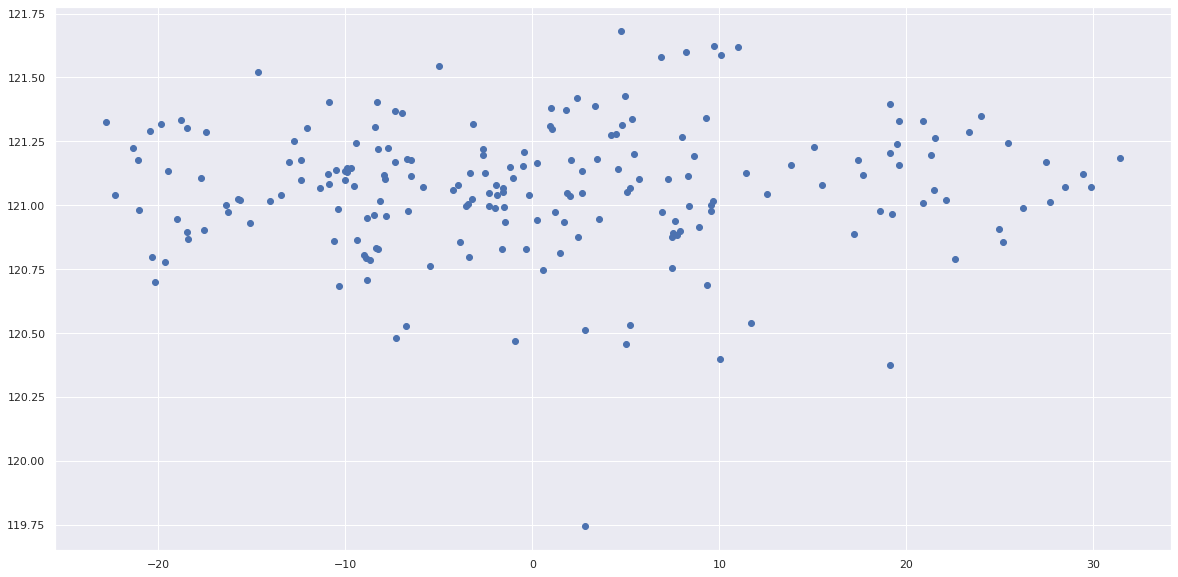

In [ ]:
# homoscedasticity

fig, ax = plt.subplots()
_ = ax.scatter(residual , y_pred)

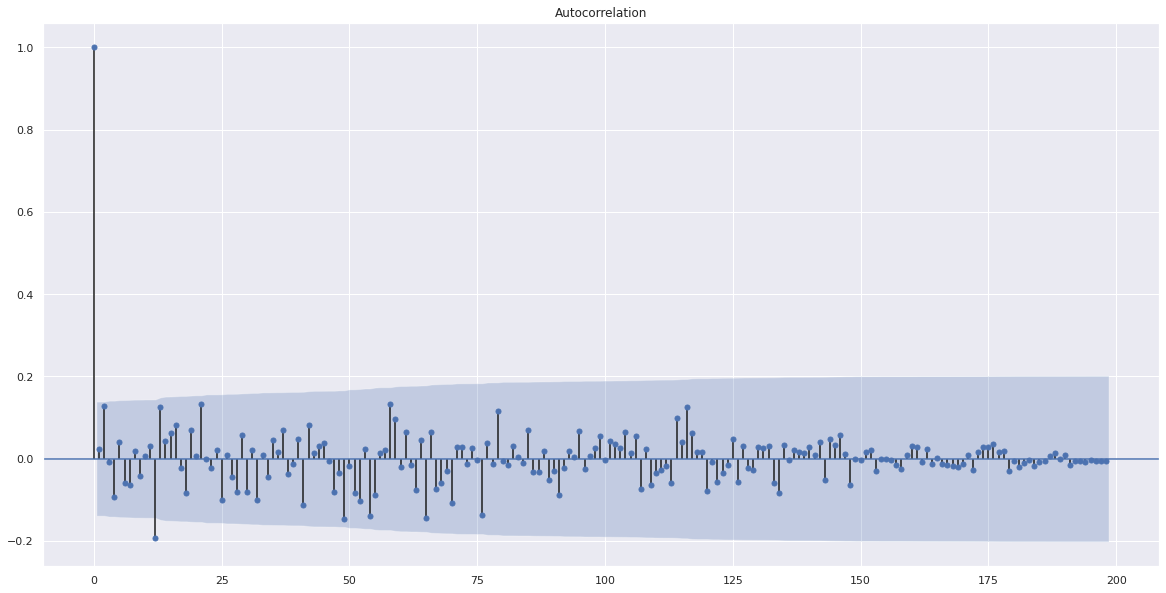

In [ ]:
# auto correlation

acf = smt.graphics.plot_acf(residual, lags=198 , alpha=0.05)
acf.show()